In [2]:
#Check original code on Google Colab:
 #   https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/3D_image_classification.ipynb#scrollTo=MARmmORmDDHf

In [3]:
## Supporting functions ##

import nibabel as nib
from scipy import ndimage
import matplotlib.pyplot as plt
import os
from  skimage import measure

def read_nifti_file(filepath):
  # returns raw data as a 3D numpy array
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan


def normalize(volume):
    """Normalize the volume"""
    # normalizes the values in the 3D volume to a range of [0, 1].
    min = volume.min()
    max = volume.max()
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32") #saves memory & is compatible with DL models
    return volume


def resize_volume(img,  desired_depth = 64, desired_width = 128, desired_height = 128):
    """Resize across z-axis"""
    # Get current depth
    current_depth = img.shape[0]
    current_width = img.shape[1]
    current_height = img.shape[2]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    ## Rotate
    #img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (depth_factor,width_factor, height_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    return volume


In [8]:
## Reading file and visualize shape ##
img = read_nifti_file('CC0001_philips_15_55_M.nii.gz')
print (img.shape)
# (depth, width, height)

(171, 256, 256)


In [9]:
## Normalizing images between 0 and 1 to understand range of voxel values
print (img.min(),img.max())
img = normalize(img)
print (img.min(),img.max())

0.0 3030.7017822265625
0.0 1.0


(64, 128, 128)


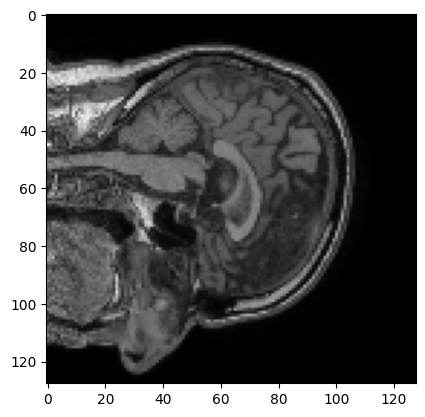

(64, 128, 128)


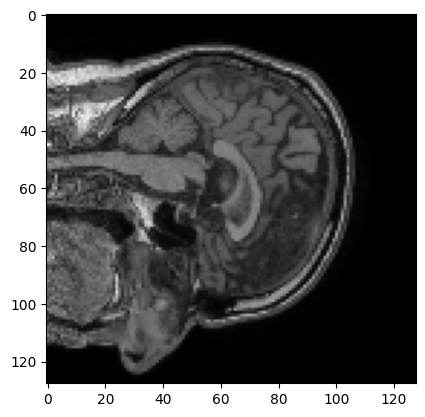

In [12]:
## resizing images and visualizing imageresize_volume(volume)
print (img.shape)
plt.imshow(img[32,:,:], cmap=plt.get_cmap('gray'))
plt.show()

img = resize_volume(img)
print (img.shape)
plt.imshow(img[32,:,:], cmap=plt.get_cmap('gray'))
plt.show()

# changing the slicing of the array (32, :, : vs. :,32,: showcases the images in different axises)


0.82362974


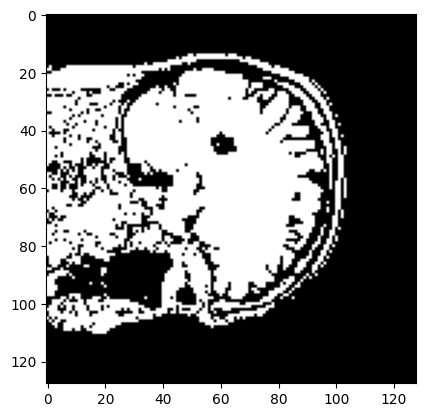

In [15]:
## Binarize image using intensity thresholding ##
print (img.max())
plt.imshow(img[40,:,:]>0.2, cmap=plt.get_cmap('gray'))
plt.show()